In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("heart.csv")  # Example dataset

print(df.head())
print(df.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [5]:
X = df.drop("target", axis=1)   # target column name depends on dataset
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



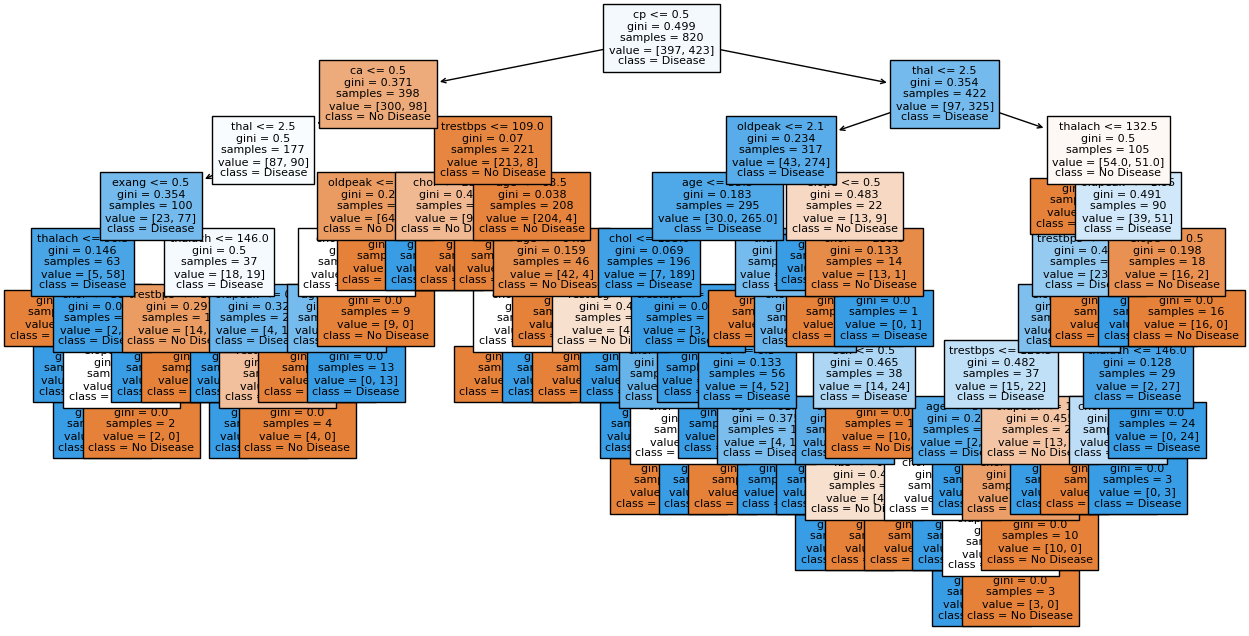

In [7]:
plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Disease", "Disease"],
          filled=True, fontsize=8)
plt.show()


In [9]:
dt_model_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model_pruned.fit(X_train, y_train)
y_pred_pruned = dt_model_pruned.predict(X_test)
print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))


Pruned Tree Accuracy: 0.8


In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


cp          0.135072
ca          0.127327
thalach     0.122169
oldpeak     0.121905
thal        0.110518
age         0.077908
chol        0.074822
trestbps    0.071171
exang       0.057594
slope       0.045782
sex         0.028731
restecg     0.018557
fbs         0.008444
dtype: float64


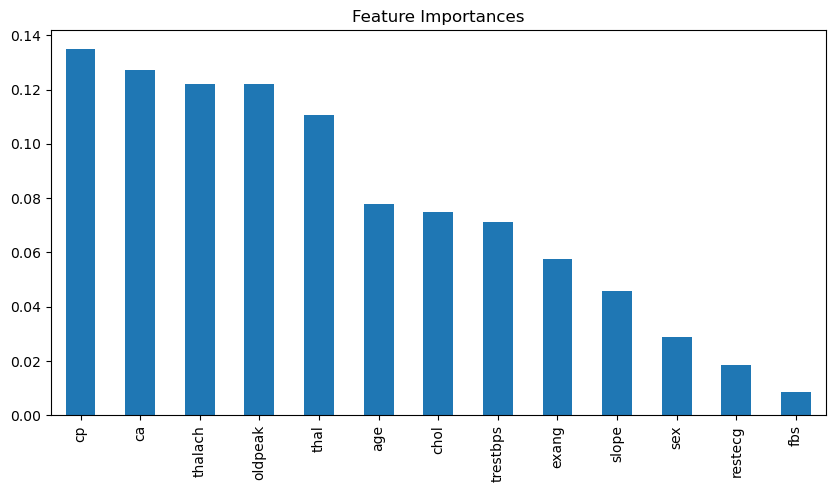

In [13]:
importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_imp)

feat_imp.plot(kind="bar", figsize=(10,5), title="Feature Importances")
plt.show()


In [15]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Average CV Accuracy: 0.9970731707317073
